# 95 percentage level: 
## 

### Content


1. [The load of packages, modules, and data](#1-load-of-packages-modules-and-data)


3. [Seasonal and Monthly 95 percentage level](#3-seasonal-and-monthly-95-percentage-level)


[Go to the end of file](#the-end)

#

## 1. The load of packages, modules, and data

In [1]:
import sys
from aqua import Reader
sys.path.insert(0, '../../')
from tropical_rainfall import Tropical_Rainfall

In [2]:
#sys.path.insert(0, '../')
#from tropical_rainfall_func import space_regrider

#### ICON, ngc3028, lra

In [ ]:
reader          = Reader(model="ICON", exp="ngc3028", source="lra-r100-monthly")
icon_ngc3028    = reader.retrieve()
icon_ngc3028    = icon_ngc3028['tprate'][:]*86400
icon_ngc3028.attrs['units'] = "mm/day"

#### IFS, tco2559-ng5, lra

In [3]:
reader              = Reader(model="IFS", exp="tco2559-ng5", source="lra-r100-monthly") 
ifs_tco2559_ng5     = reader.retrieve()
ifs_tco2559_ng5     = ifs_tco2559_ng5['tprate'][:]*86400 
ifs_tco2559_ng5.attrs['units'] = "mm/day"

#### IFS, tco1279-orca025-cycle3, lra

In [2]:
reader                  = Reader(model="IFS", exp="tco1279-orca025-cycle3", source="lra-r100-monthly")
ifs_tco1279_orca025     = reader.retrieve()
ifs_tco1279_orca025     = ifs_tco1279_orca025['tprate'][:]*86400
ifs_tco1279_orca025.attrs['units'] = "mm/day"


#### MSWEP, monthly 

In [5]:
reader                  = Reader(model="MSWEP", exp="past", source="monthly", regrid = "r100")
mswep_mon               = reader.retrieve(regrid=True)
mswep_mon               = mswep_mon['tprate'][:]*86400
mswep_mon.attrs['units'] = "mm/day"

#### Initialization of the diagnostic

In [4]:
diag = Tropical_Rainfall(trop_lat=90,  num_of_bins = 1000, first_edge = 0, width_of_bin = 1, loglevel='error')

path_to_95percent_level = "/work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/95percent_level/"

## 95 percentage level across the time coordinate

In [ ]:
diag.seasonal_095level_into_netcdf(icon_ngc3028, space_grid_factor=0.1, rel_error=2, #lon_length=10, lat_length = 10, 
                                                   trop_lat=90,
                                                   path_to_netcdf=path_to_95percent_level,  name_of_file='icon_ngc3028')

In [ ]:
diag.seasonal_095level_into_netcdf(ifs_tco2559_ng5, space_grid_factor=0.1, rel_error=2, #lon_length=10, lat_length = 10, 
                                                   trop_lat=90,
                                                   path_to_netcdf=path_to_95percent_level,  name_of_file='ifs_tco2559_ng5')

In [5]:
diag.seasonal_095level_into_netcdf(ifs_tco1279_orca025, space_grid_factor=0.1, rel_error=2, #lon_length=10, lat_length = 10, 
                                                   trop_lat=90,
                                                   path_to_netcdf=path_to_95percent_level,  name_of_file='ifs_tco1279_orca025')

/work/bb1153/b382267/AQUA/diagnostics/tropical_rainfall/notebooks/../../tropical_rainfall/tropical_rainfall_class.py:2152: RuntimeWarning: invalid value encountered in divide
  if threshold     < value:
/work/bb1153/b382267/AQUA/diagnostics/tropical_rainfall/notebooks/../../tropical_rainfall/tropical_rainfall_class.py:2152: RuntimeWarning: invalid value encountered in divide
  if threshold     < value:
/work/bb1153/b382267/AQUA/diagnostics/tropical_rainfall/notebooks/../../tropical_rainfall/tropical_rainfall_class.py:2152: RuntimeWarning: invalid value encountered in divide
  if threshold     < value:
/work/bb1153/b382267/AQUA/diagnostics/tropical_rainfall/notebooks/../../tropical_rainfall/tropical_rainfall_class.py:2152: RuntimeWarning: invalid value encountered in divide
  if threshold     < value:


/work/bb1153/b382267/AQUA/diagnostics/tropical_rainfall/notebooks/../../tropical_rainfall/tropical_rainfall_class.py:2152: RuntimeWarning: invalid value encountered in divide
  if threshold     < value:
/work/bb1153/b382267/AQUA/diagnostics/tropical_rainfall/notebooks/../../tropical_rainfall/tropical_rainfall_class.py:2152: RuntimeWarning: invalid value encountered in divide
  if threshold     < value:
/work/bb1153/b382267/AQUA/diagnostics/tropical_rainfall/notebooks/../../tropical_rainfall/tropical_rainfall_class.py:2152: RuntimeWarning: invalid value encountered in divide
  if threshold     < value:


In [9]:
icon_ngc3028_for_plot  = diag.open_dataset("/work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/95percent_level/trop_rainfall_icon_ngc3028_2020-09-01T00_2024-11-01T00_histogram.nc")
icon_ngc3028_for_plot

<xarray.Dataset>
Dimensions:  (lon: 36, lat: 18)
Coordinates:
    time     datetime64[ns] ...
  * lon      (lon) float64 0.0 10.2 20.4 30.6 40.8 ... 326.4 336.6 346.8 357.0
  * lat      (lat) float64 -89.5 -79.09 -68.68 -58.26 ... 56.26 66.68 77.09 87.5
Data variables:
    DJF      (lat, lon) float64 ...
    MAM      (lat, lon) float64 ...
    JJA      (lat, lon) float64 ...
    SON      (lat, lon) float64 ...
    Yearly   (lat, lon) float64 ...
Attributes: (12/13)
    long_name:     Total precipitation rate
    shortName:     tprate
    component:     atmo
    cell_methods:  time: mean cell: mean
    units:         mm/day
    vgrid:         surface
    ...            ...
    cfVarName:     tprate
    history:       2023-06-29 00:53:40 variable renamed by AQUA fixer;\n2023-...
    paramId:       260048
    time_band:     2020-09-01T00:00:00.000000000, 2024-11-01T00:00:00.0000000...
    lat_band:      -89.5, 87.5, freq=10.411764705882348
    lon_band:      0.0, 357.0, freq=10.2

In [ ]:
ifs_tco2559_ng5_for_plot  = diag.open_dataset("/work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/95percent_level/trop_rainfall_ifs_tco2559_ng5_2020-09-01T00_2020-11-01T00_histogram.nc")
ifs_tco2559_ng5_for_plot

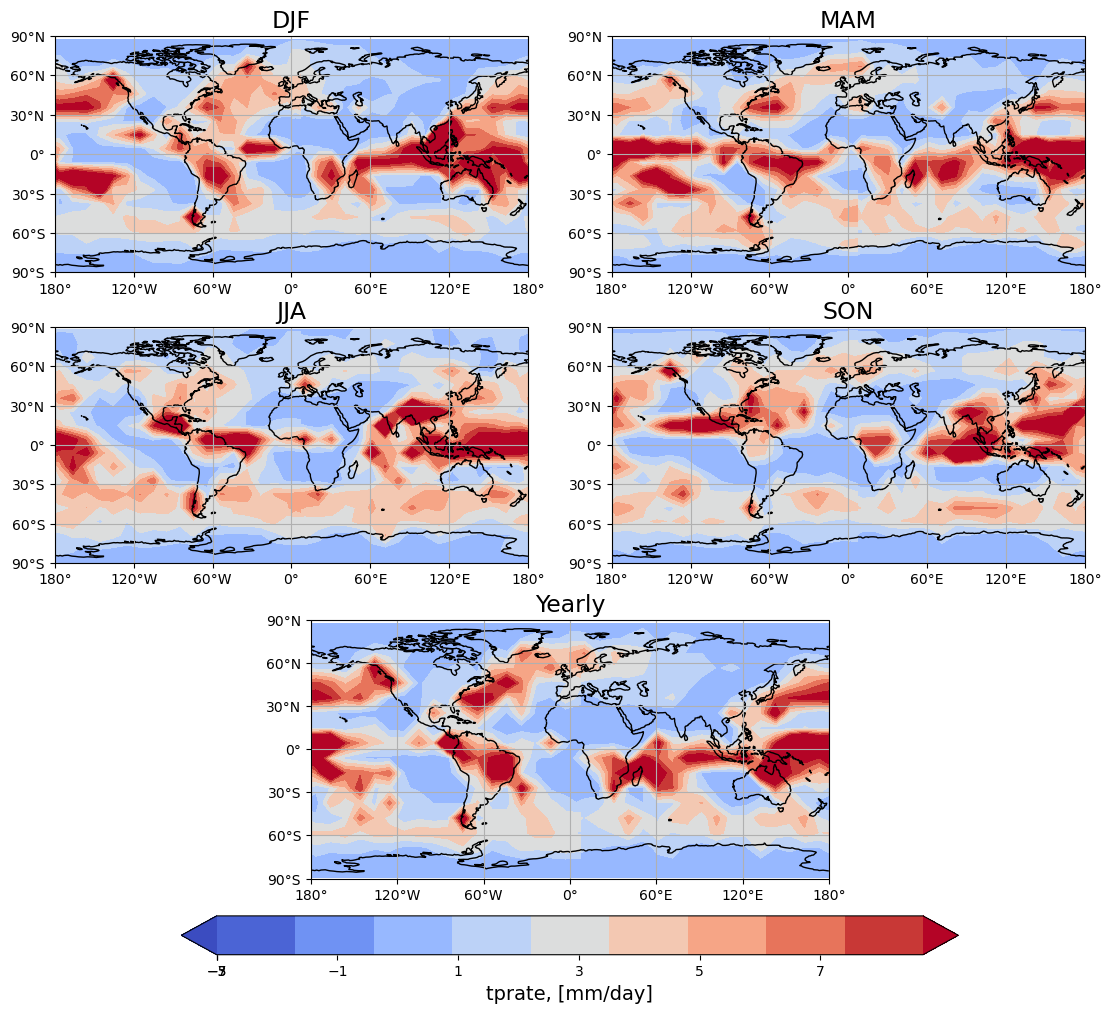

In [10]:
diag.plot_seasons_or_months(icon_ngc3028_for_plot, vmin = -3, vmax=10)

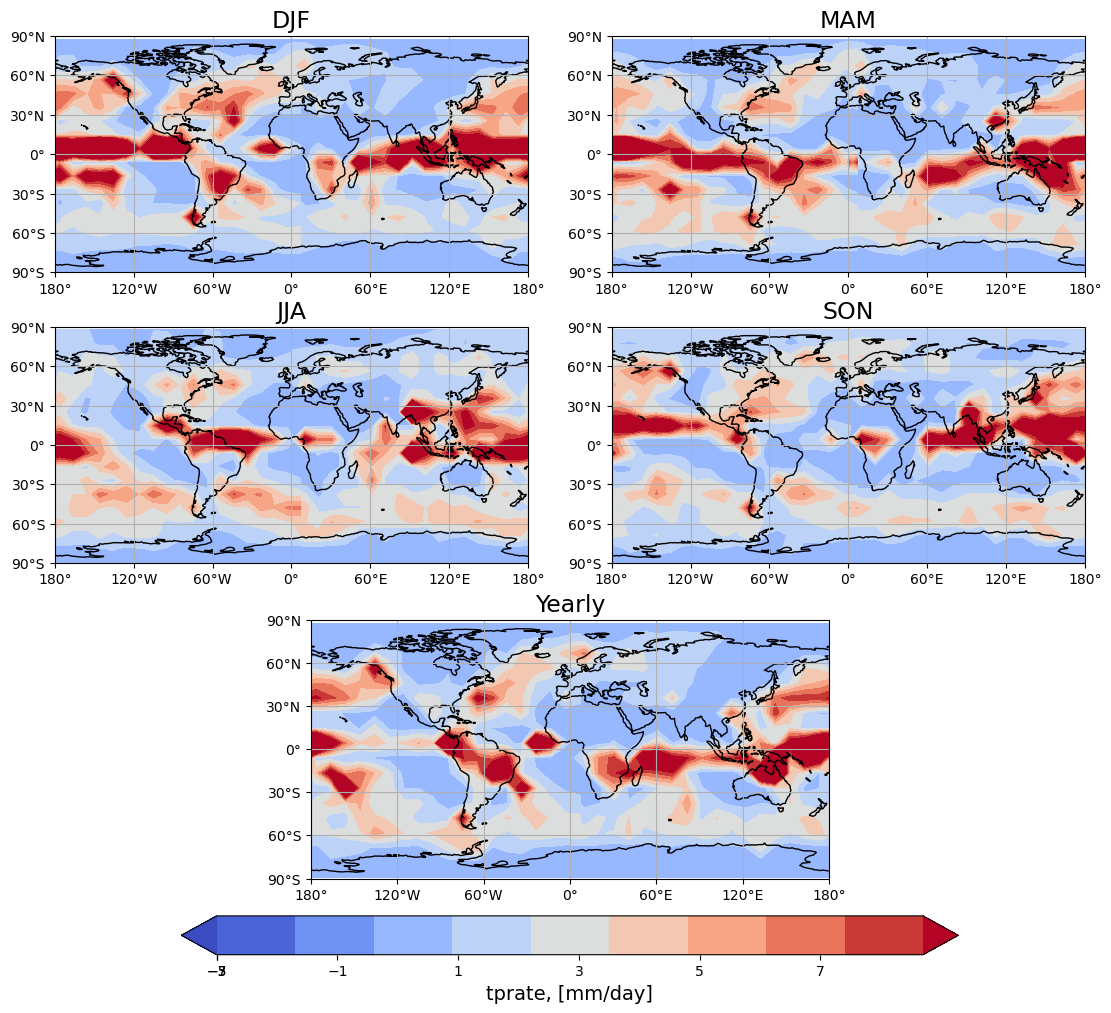

In [17]:
diag.plot_seasons_or_months(ifs_tco2559_ng5_for_plot, vmin = -3, vmax=10)

## 3. Seasonal and monthly mean, above 95 percentage level 

### Calculations of a threshold precipitation value in a different units 

In [13]:
import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter

#### By default, the function calculates the 95 percent level with 10% relative error and returns 
 - threshold value of precipitation 
 - units of precipitation 
 - final value of percentage level (including error)

In [13]:
diag.get_95percent_level(icon_ngc3028)

(15.5, 'mm/day', 0.9488847429519072)

Users can set the relative error on a percentage level

In [15]:
diag.get_95percent_level(ifs_tco2559_ng5, rel_error = 0.10)

(0.00024375000000000004, 'kg m**-2 s**-1', 0.9492787519437667)

User can modify the units of the threshold precipitation value

In [16]:
diag.get_95percent_level(ifs_tco1279_orca025, new_unit='m/s')

(2.0078124999999998e-07, 'm/s', 0.947272781986912)

User can also modify the default percentage level 

In [17]:
diag.get_95percent_level(mswep_mon, value=0.9)

(0.00017597656249999997, 'kg m**-2 s**-1', 0.8972933138848432)

### Seasonal Plot of 60 percent level

/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua/lib/python3.10/site-packages/dask/array/core.py:3471: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  warnings.warn(
/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua/lib/python3.10/site-packages/dask/array/core.py:3471: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  warnings.warn(
/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua/lib/python3.10/site-packages/dask/array/core.py:3471: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  warnings.warn(
/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua/lib/python3.10/site-packages/dask/array/core.py:3471: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  war

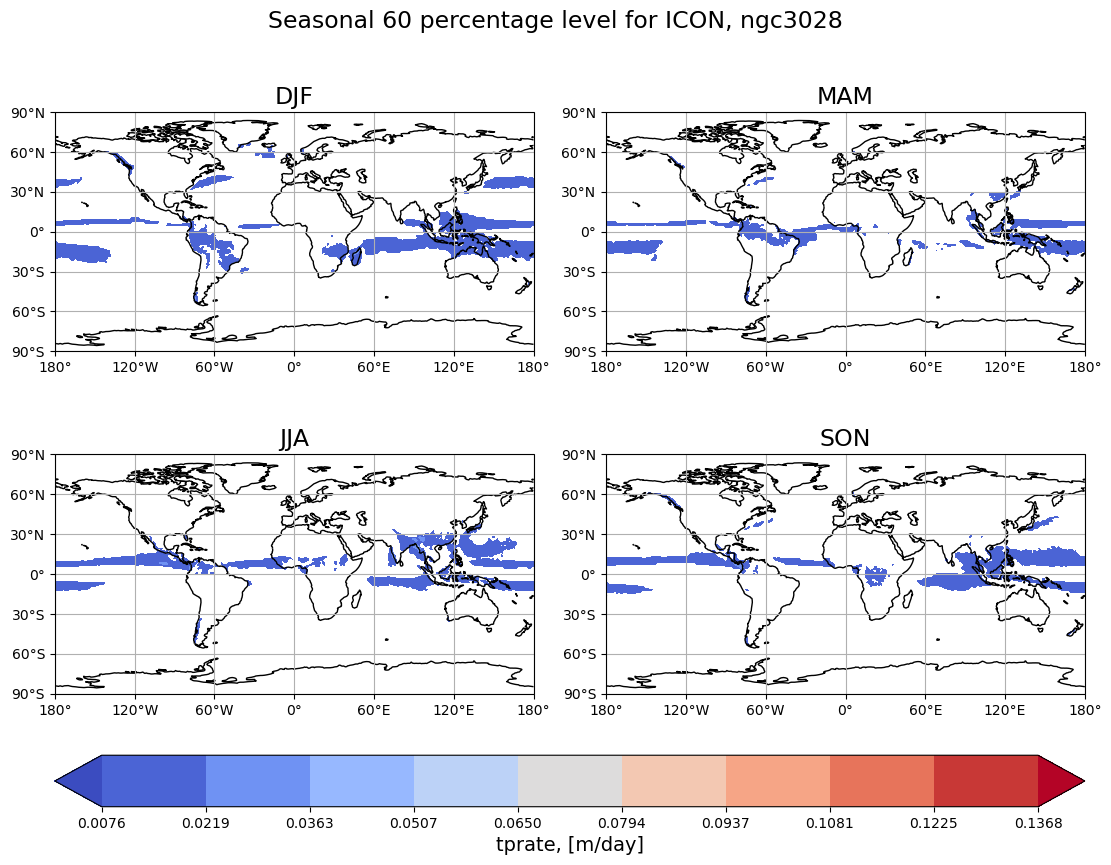

In [5]:
diag = Tropical_Rainfall(trop_lat=15,  num_of_bins = 20, first_edge = 0, width_of_bin = 1*10**(-3)/40)
diag.plot_095level(icon_ngc3028, new_unit='m/day',  trop_lat=90, value=0.6, 
                   plot_title='Seasonal 60 percentage level for ICON, ngc3028',
                   path_to_pdf=path_to_pdf, name_of_file='icon_ngc3028_lra_r100_monthly_60percent_level')

##### The end